load the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [2]:
raw_data = pd.read_csv("./machine learning datasets/Crude OIl Prod.csv")
raw_data.head()

,Year,Month,Crude Oil Price,Production,Crude Oil Export,Total Production[barrel],Total Price
0,2006,1,63.85,2.59,2.14,2590000,165371500
1,2006,2,61.33,2.47,2.02,2470000,151485100
2,2006,3,65.00,2.25,1.80,2250000,146250000
3,2006,4,72.09,2.32,1.87,2320000,167248800
4,2006,5,71.18,2.28,1.83,2280000,162290400


performing exploratory data analysis

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      202 non-null    int64  
 1   Month                     202 non-null    int64  
 2   Crude Oil Price           202 non-null    float64
 3   Production                202 non-null    float64
 4   Crude Oil Export          202 non-null    float64
 5   Total Production[barrel]  202 non-null    int64  
 6   Total Price               202 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 11.2 KB


In [6]:
raw_data.columns

Index(['Year', 'Month', 'Crude Oil Price', 'Production', 'Crude Oil Export',
       'Total Production[barrel]', 'Total Price'],
      dtype='object')

In [7]:
raw_data.shape

(202, 7)

summary statistic

In [8]:
raw_data.describe()

,Year,Month,Crude Oil Price,Production,Crude Oil Export,Total Production[barrel],Total Price
count,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02,2.020000e+02
mean,2013.920792,6.450495,78.258564,2.026683,1.576683,2.026683e+06,1.603807e+08
std,4.869814,3.441049,26.494123,0.363397,0.363397,3.633966e+05,6.694750e+07
min,2006.000000,1.000000,14.280000,0.940000,0.490000,9.400000e+05,2.913120e+07
25%,2010.000000,3.250000,58.620000,1.932500,1.482500,1.932500e+06,1.029467e+08
50%,2014.000000,6.000000,73.705000,2.090000,1.640000,2.090000e+06,1.424608e+08
75%,2018.000000,9.000000,105.317500,2.277500,1.827500,2.277500e+06,2.179638e+08
max,2022.000000,12.000000,138.740000,2.880000,2.430000,2.880000e+06,3.012658e+08


In [10]:
#show missing values
raw_data.isnull().sum()

Year                        0
Month                       0
Crude Oil Price             0
Production                  0
Crude Oil Export            0
Total Production[barrel]    0
Total Price                 0
dtype: int64

In [11]:
#checking for duplicate values
raw_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198    False
199    False
200    False
201    False
Length: 202, dtype: bool

performing data manipulation

In [13]:
data = raw_data.copy()
data.head()

,Year,Month,Crude Oil Price,Production,Crude Oil Export,Total Production[barrel],Total Price
0,2006,1,63.85,2.59,2.14,2590000,165371500
1,2006,2,61.33,2.47,2.02,2470000,151485100
2,2006,3,65.00,2.25,1.80,2250000,146250000
3,2006,4,72.09,2.32,1.87,2320000,167248800
4,2006,5,71.18,2.28,1.83,2280000,162290400


In [19]:
Sum_of_yearly_prod = data.groupby("Year")["Total Production[barrel]"].sum()
Sum_of_yearly_prod


Year
2006    28590000
2007    26420000
2008    25190000
2009    25330000
2010    29610000
2011    28570000
2012    27820000
2013    26200000
2014    26470000
2015    25520000
2016    21800000
2017    22670000
2018    22980000
2019    24150000
2020    21070000
2021    15700000
2022    11300000
Name: Total Production[barrel], dtype: int64

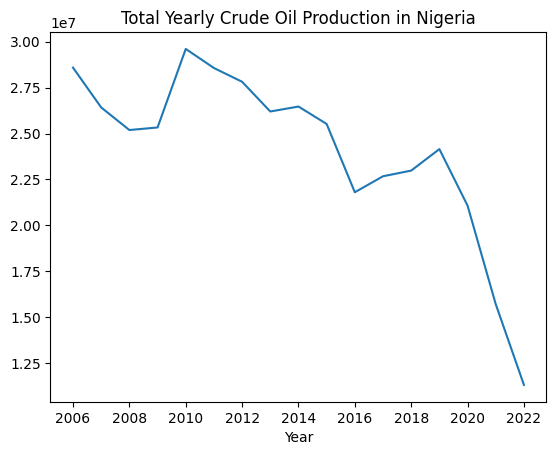

In [21]:
Sum_of_yearly_prod.plot(kind="line")
plt.title("Total Yearly Crude Oil Production in Nigeria")
plt.show()

finding the cummulative production 

In [22]:
Cummulative = data.groupby("Year")["Total Production[barrel]"].agg([max, min])
Cummulative

,max,min
Year,,
2006,2590000,2250000
2007,2320000,1960000
2008,2260000,1960000
2009,2280000,1860000
2010,2880000,2210000
2011,2510000,2270000
2012,2480000,2030000
2013,2290000,2030000
2014,2330000,2060000


finding total production and sales made per year


In [29]:
Sum_of_yearly_prod_Sales = data.groupby("Year")[["Total Production[barrel]", "Total Price"]].sum()
Sum_of_yearly_prod_Sales

,Total Production[barrel],Total Price
Year,,
2006,28590000,1904989300
2007,26420000,1981106800
2008,25190000,2536558900
2009,25330000,1627755900
2010,29610000,2400443200
2011,28570000,3247978200
2012,27820000,3164100900
2013,26200000,2909345800
2014,26470000,2658625200


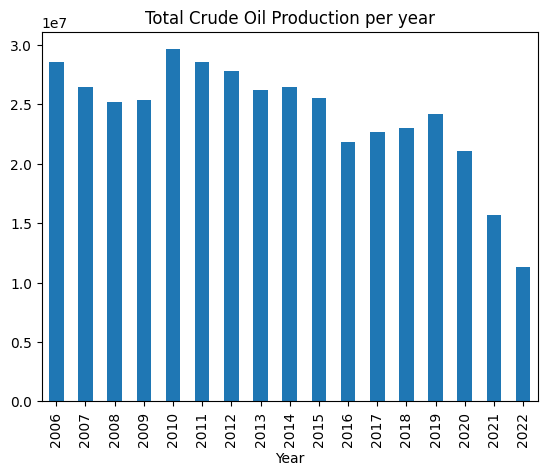

In [39]:
Yearly_production = data.groupby("Year")["Total Production[barrel]"].sum()
Yearly_production.plot(kind="bar")
plt.title("Total Crude Oil Production per year")
plt.show()

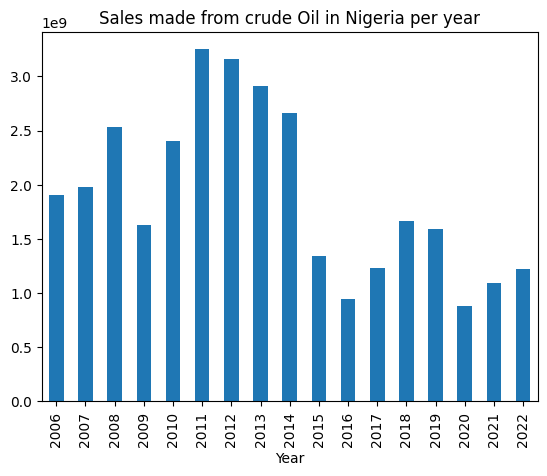

In [40]:
Yearly_sales = data.groupby("Year")["Total Price"].sum()
Yearly_sales.plot(kind="bar")
plt.title("Sales made from crude Oil in Nigeria per year")
plt.show()